## K-means

just a quick implementation of kmeans

In [1]:
import numpy as np
import pandas as pd
import random
from scipy.stats.mstats import gmean

df = pd.read_csv("iris.data")
df = df.reindex(np.random.permutation(df.index))

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
136,6.3,3.4,5.6,2.4,Iris-virginica
25,5.0,3.0,1.6,0.2,Iris-setosa
110,6.5,3.2,5.1,2.0,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
33,5.5,4.2,1.4,0.2,Iris-setosa


In [3]:

def distance(p1, p2):
        
    return np.sqrt(sum(np.subtract(p1, p2))**2)

def random_clusters(k, min_val=0, max_val=8, dim=4):
    
    clusters = []
    for i in range(k):
        c = random.sample(range(min_val, max_val), dim)
        clusters.append(c)
    return clusters

def find_closest_cluster(p, clusters):
        
    distances = [distance(p, c) for c in clusters]
    zipped = zip(distances, clusters)
    sorted_zipped = sorted(zipped, key = lambda x: x[0])

    return sorted_zipped[0][1]

def relocate_cluster(cluster, points_and_clusters):

    relevant_points = [p[0] for p in points_and_clusters if np.array_equal(p[1], cluster)]
    if len(relevant_points) == 0:
        return random_clusters(1)
    else:
        return gmean(relevant_points)
    
def evaluate(clusters, actual_means):
    
    c = sorted(clusters, key = lambda x: x[0])
    a = sorted(actual_means, key = lambda x: x[0])
    
    dists = [distance(c[i], a[i]) for i in range(len(c))]
    norm = np.linalg.norm(dists)
    return norm
    

We can see the clusters converge very quickly to the features of each flower.

In [4]:

def main():
    
    data = df.as_matrix(columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"])
    target = df.as_matrix(columns = ["class"])
    
    virginica_means = list(df.loc[df["class"] == "Iris-virginica"].mean())
    versicolor_means = list(df.loc[df["class"] == "Iris-versicolor"].mean())
    setosa_means = list(df.loc[df["class"] == "Iris-setosa"].mean())
    
    actual_means = [virginica_means, versicolor_means, setosa_means]
    
    k = 3
    clusters = random_clusters(k)
    for i in range(5):
        nearest_clusters = [find_closest_cluster(d, clusters) for d in data]
        points_with_clusters = zip(data, nearest_clusters)
        clusters = [relocate_cluster(c, points_with_clusters) for c in clusters]
        n = evaluate(clusters, actual_means)  
        print n
    
    return clusters

In [5]:
final_clusters = main()

0.883452705985
0.619082733425
0.531738425113
0.489200931582
0.489200931582


/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


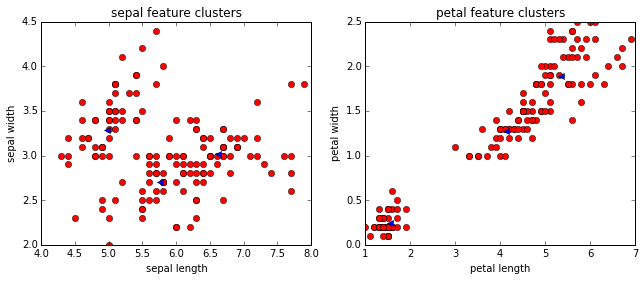

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

virginica = df.loc[df["class"] == "Iris-virginica"]
versicolor = df.loc[df["class"] == "Iris-versicolor"]
setosa = df.loc[df["class"] == "Iris-setosa"]

fig = plt.figure()
ax = fig.add_subplot(121)
x_points = df["sepal_length"]
y_points = df["sepal_width"]
p = ax.plot(x_points, y_points, 'ro')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_title('sepal feature clusters')
fx = [f[0] for f in final_clusters]
fy = [f[1] for f in final_clusters]
q = ax.plot(fx, fy, 'ro', marker = '<', color = 'blue')

ax = fig.add_subplot(122)
x_points = df["petal_length"]
y_points = df["petal_width"]
p = ax.plot(x_points, y_points, 'ro')
ax.set_xlabel('petal length')
ax.set_ylabel('petal width')
ax.set_title('petal feature clusters')
fx = [f[2] for f in final_clusters]
fy = [f[3] for f in final_clusters]
q = ax.plot(fx, fy, 'ro', marker = '<', color = 'blue')

fig.show()

fig.subplots_adjust(right=1.5)

